<a href="https://colab.research.google.com/github/yongbin02/AI/blob/main/9%EC%A3%BC%EC%B0%A8/TSLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
# 1. 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI/data/TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [5]:
# 2. 피처 선택 및 전처리
features_to_use = ['Open', 'High', 'Low', 'Close']
df_features = df[features_to_use]
df_features = df_features.dropna()

In [6]:
# 3. 정규화
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_features)

In [9]:
# 4. 시퀀스 생성

# window=3으로 설정 -> 3일간의 기록을 보고 다음날 close 예측
window = 3
X, y = [], []
target_col_index = 3 # close 피쳐

for i in range(len(data_scaled) - window):
    X.append(data_scaled[i : i + window])
    y.append(data_scaled[i + window, target_col_index])

X, y = np.array(X), np.array(y)

In [10]:
# 5. Train/Test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [11]:
# 6. RNN 모델
model_rnn = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window, len(features_to_use))),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1) # 예측값은 1개 (다음날 Close)
])

model_rnn.compile(optimizer='adam', loss='mse')

model_rnn.fit(
    X_train, y_train,
    epochs=50, batch_size=32,
    validation_data=(X_test, y_test),
    verbose=0
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# 7. LSTM 모델
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window, len(features_to_use))),
    tf.keras.layers.Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')

model_lstm.fit(
    X_train, y_train,
    epochs=50, batch_size=32,
    validation_data=(X_test, y_test),
    verbose=0
)

In [13]:
# 8. MSE 계산

# 정규화된(Scaled) MSE 계산
y_pred_rnn_scaled = model_rnn.predict(X_test)
y_pred_lstm_scaled = model_lstm.predict(X_test)

mse_rnn_scaled = mean_squared_error(y_test, y_pred_rnn_scaled)
mse_lstm_scaled = mean_squared_error(y_test, y_pred_lstm_scaled)

print(f"RNN Test MSE (Scaled Data): {mse_rnn_scaled}")
print(f"LSTM Test MSE (Scaled Data): {mse_lstm_scaled}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
RNN Test MSE (Scaled Data): 0.02084906942108891
LSTM Test MSE (Scaled Data): 0.0013813123900723225


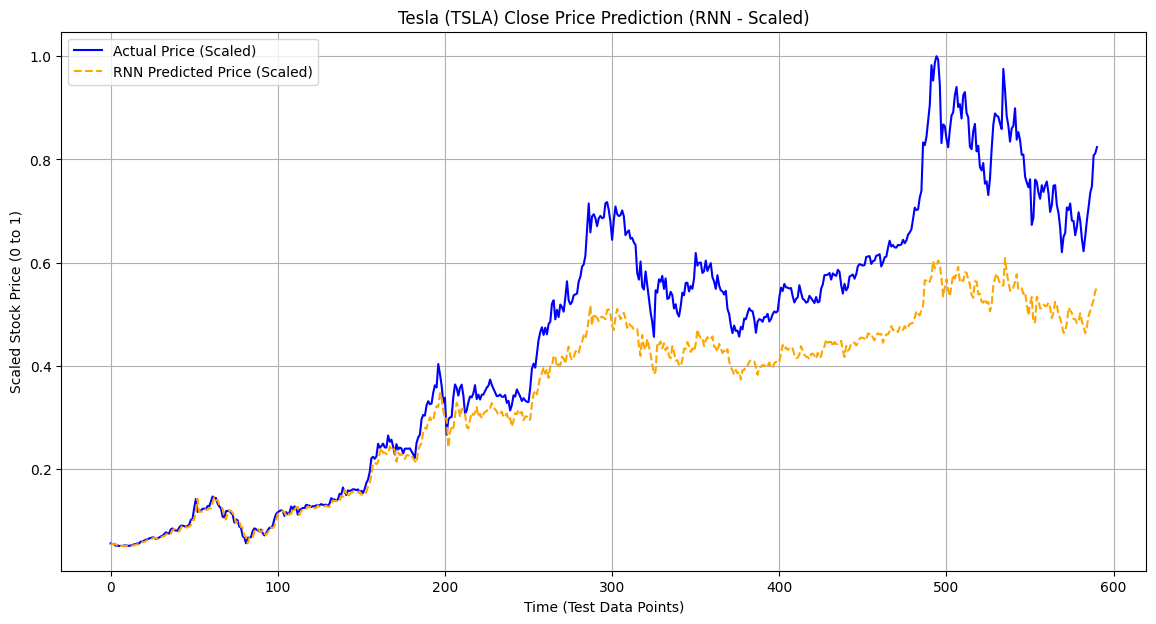

In [14]:
# 9. 결과 시각화

# RNN
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual Price (Scaled)', color='blue')
plt.plot(y_pred_rnn_scaled, label='RNN Predicted Price (Scaled)', color='orange', linestyle='--')
plt.title('Tesla (TSLA) Close Price Prediction (RNN - Scaled)')
plt.xlabel('Time (Test Data Points)')
plt.ylabel('Scaled Stock Price (0 to 1)')
plt.legend()
plt.grid(True)
plt.show()

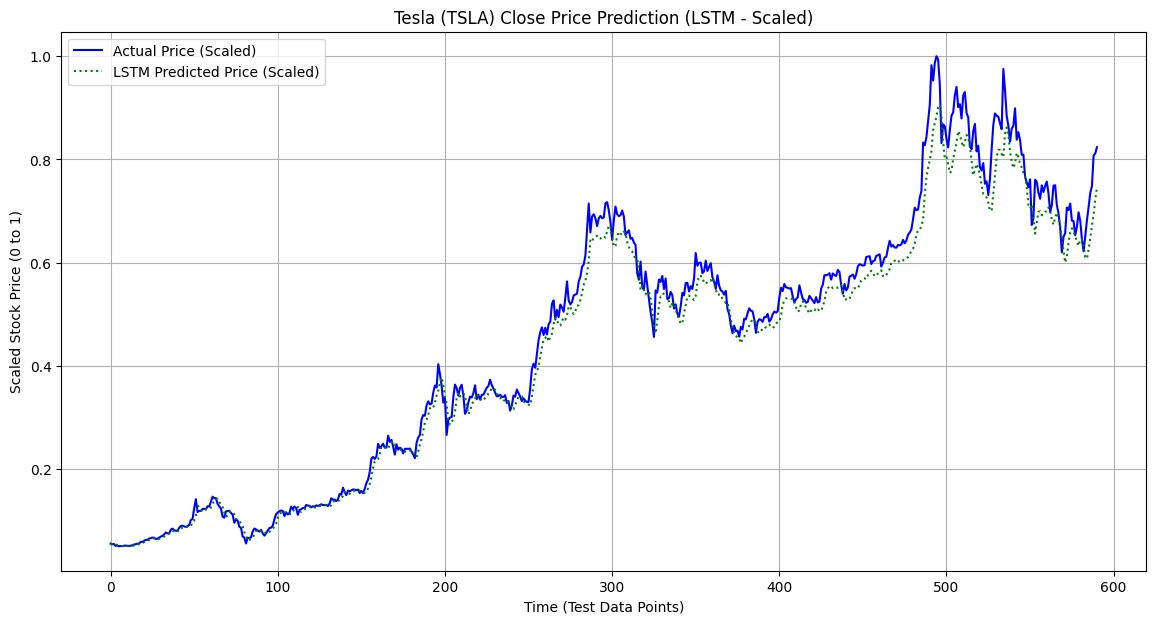

In [15]:
# LSTM
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual Price (Scaled)', color='blue')
plt.plot(y_pred_lstm_scaled, label='LSTM Predicted Price (Scaled)', color='green', linestyle=':')
plt.title('Tesla (TSLA) Close Price Prediction (LSTM - Scaled)')
plt.xlabel('Time (Test Data Points)')
plt.ylabel('Scaled Stock Price (0 to 1)')
plt.legend()
plt.grid(True)
plt.show()